In [24]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from common import CityResult
from file_name_generator import generate_new_name


Загрузка данных

In [25]:
thread_path = '../clusters_results/test/thread'
usual_path = '../clusters_results/test/usual'

In [26]:
onlyfiles = [f for f in listdir(thread_path) if isfile(join(thread_path, f))]
thread_results : dict[str:CityResult]= {}
for name in onlyfiles:
    with open(join(thread_path, name), 'rb') as f:
        thread_results[name] = pickle.load(f)
        f.close()

In [27]:
onlyfiles = [f for f in listdir(usual_path) if isfile(join(usual_path, f))]
usual_results : dict[str:CityResult]= {}
for name in onlyfiles:
    with open(join(usual_path, name), 'rb') as f:
        usual_results[name] = pickle.load(f)
        f.close()

Обработка данных

In [28]:
def theory_func(x,c, g, N = 9574, b0 = 1):
    x = x * c
    q = np.log(x) / np.log(N)
    return g / (x / b0 * (1 + q) + c / (np.sqrt(x * N)) * (1 - q))

In [29]:
def get_date(results):
    X_a = {}
    Y_err = {}
    Y_err_std = {}

    Y_speedup = {}

    for name in results:
        result: CityResult = results[name]
        X_a[name] = [a.alpha for a in result.points_results]
        Y_err[name] = [np.mean(a.errors) for a in result.points_results]
        Y_err_std[name] = [np.std(a.errors) for a in result.points_results]
        Y_speedup[name] = [np.mean(a.speed_up) for a in result.points_results]

    return X_a, Y_err, Y_err_std, Y_speedup

Графики:

ASHA.pkl 729
BARCELONA.pkl 8928
BERLIN.pkl 28071
EKB.pkl 5467
KRG.pkl 3347
MSK.pkl 17753
PARIS.pkl 9570
Prague.pkl 21651
SBP.pkl 22320
SINGAPORE.pkl 23859


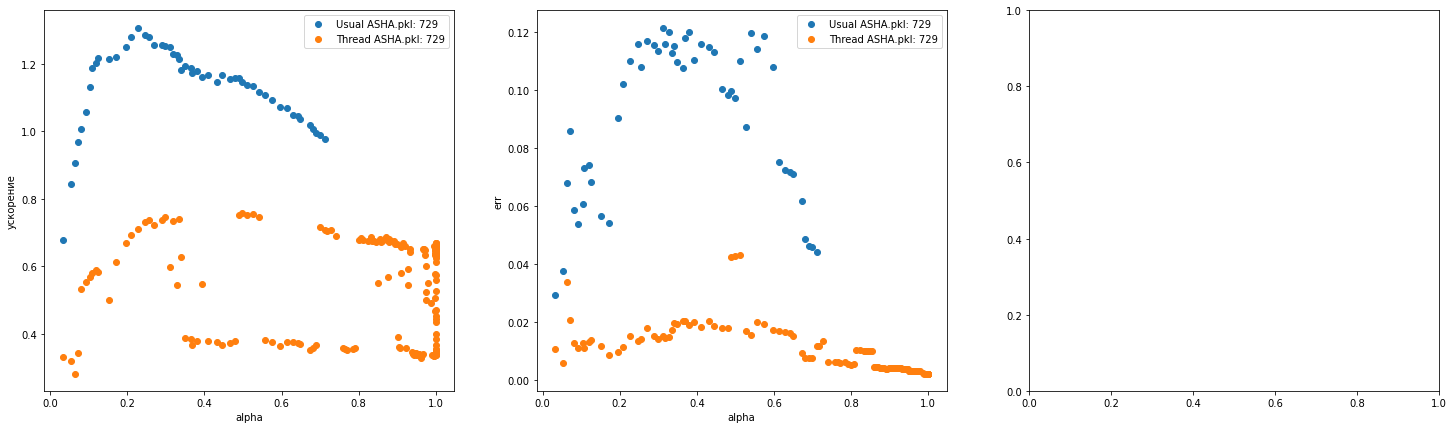

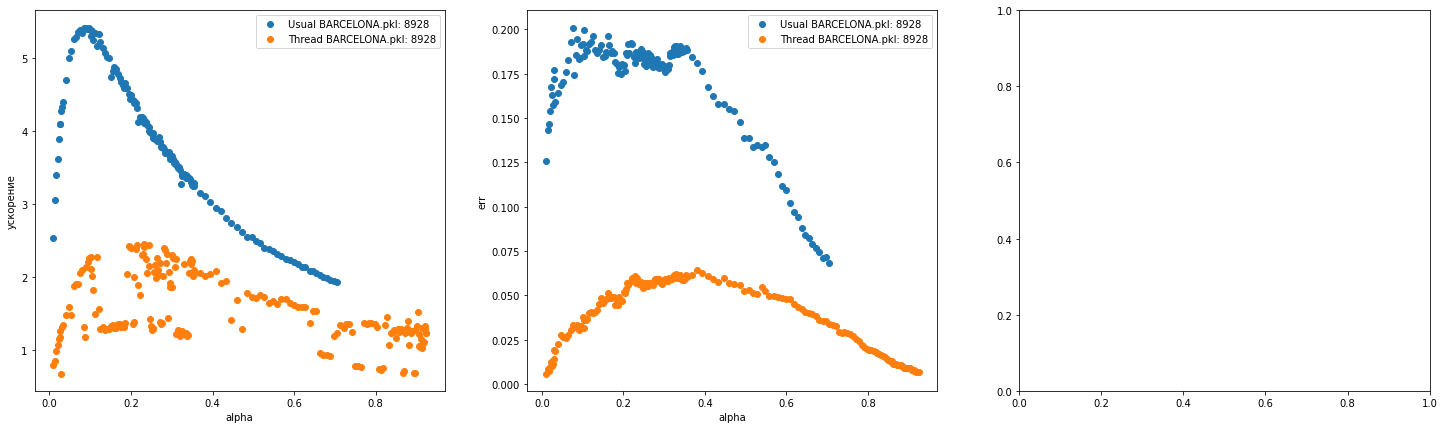

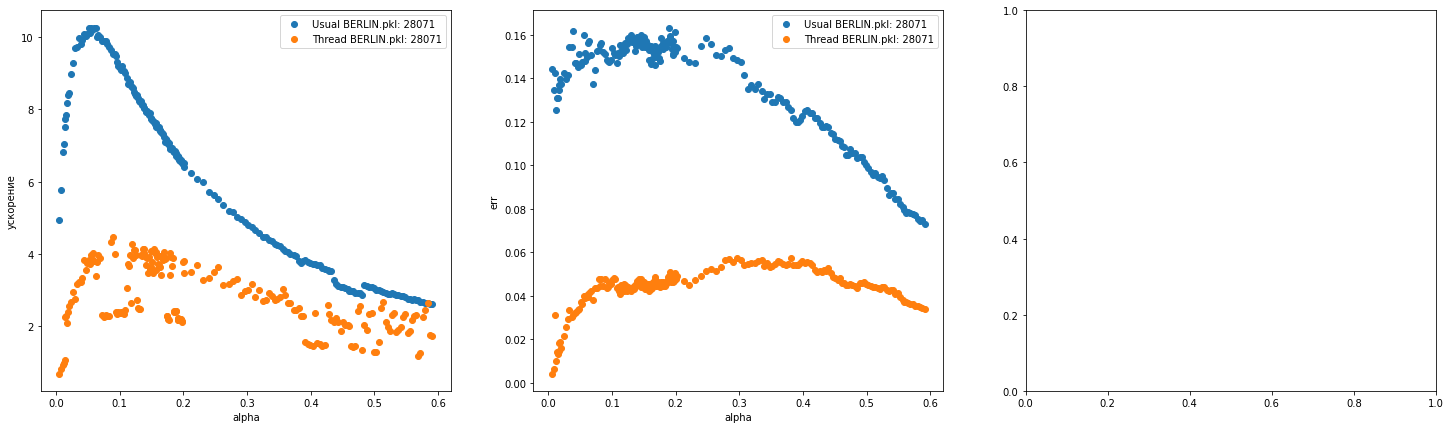

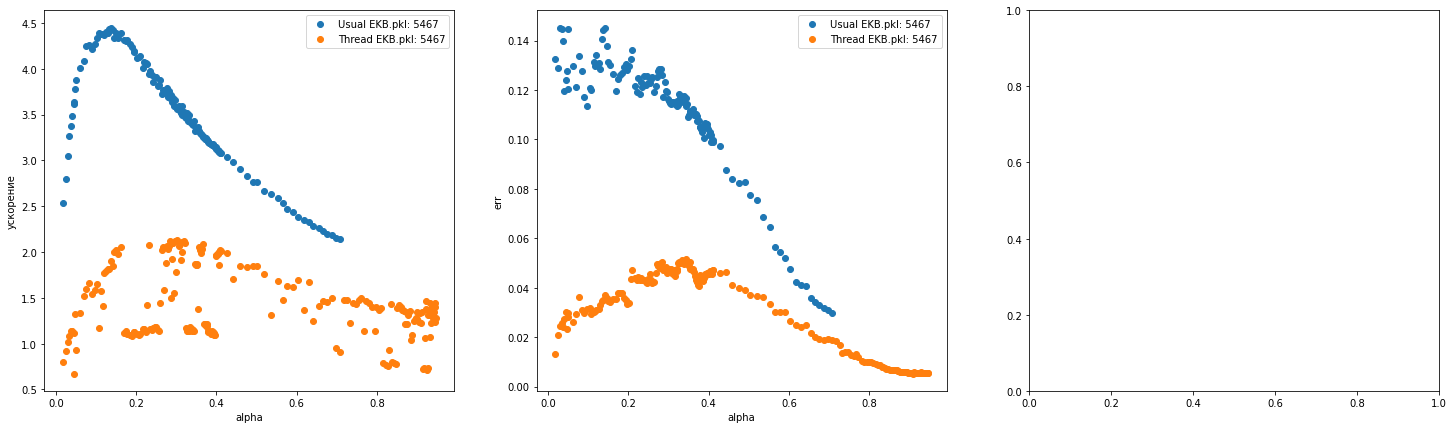

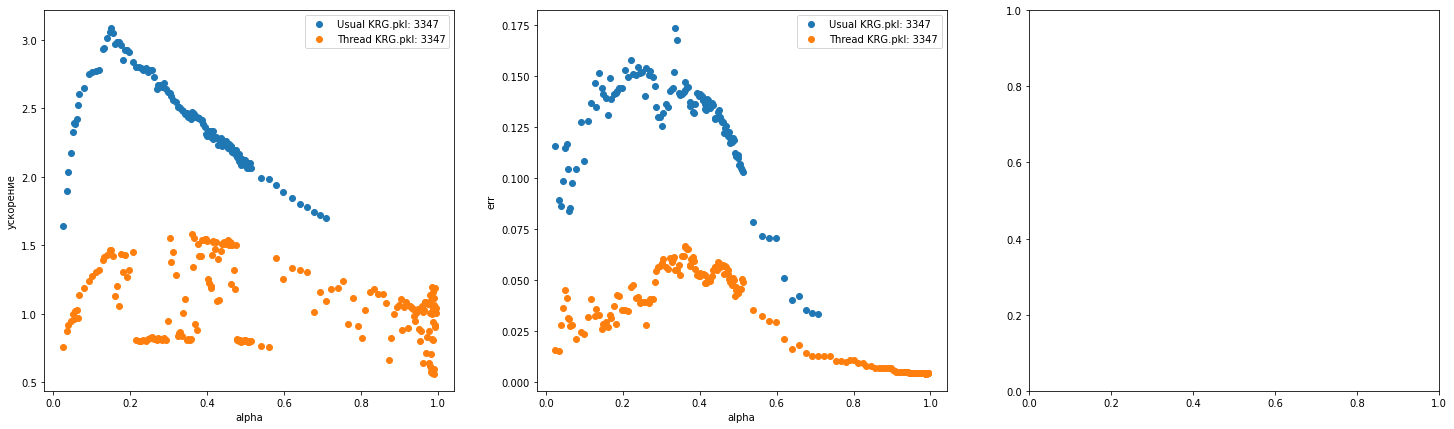

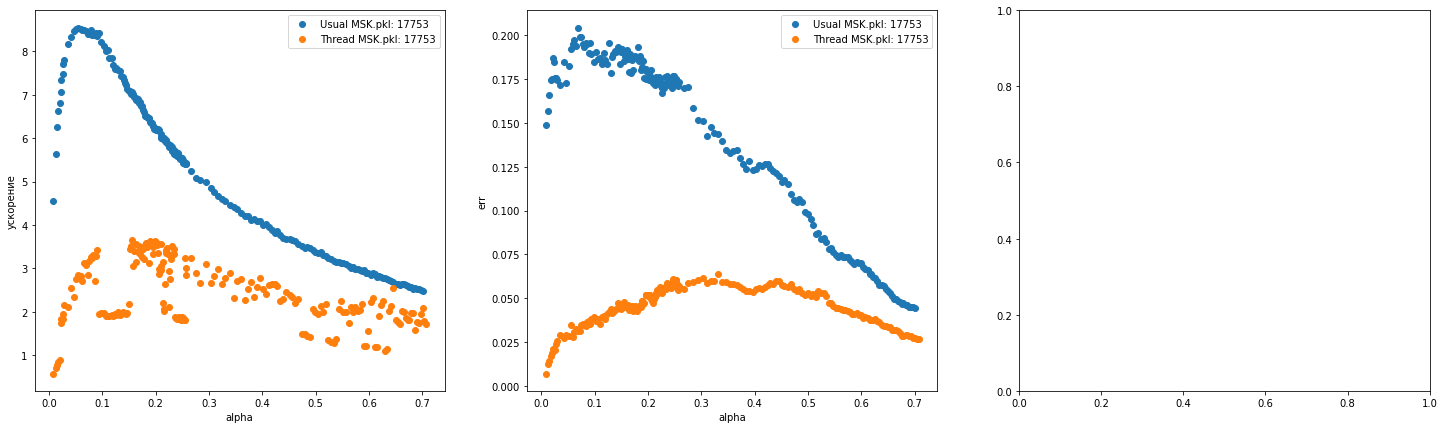

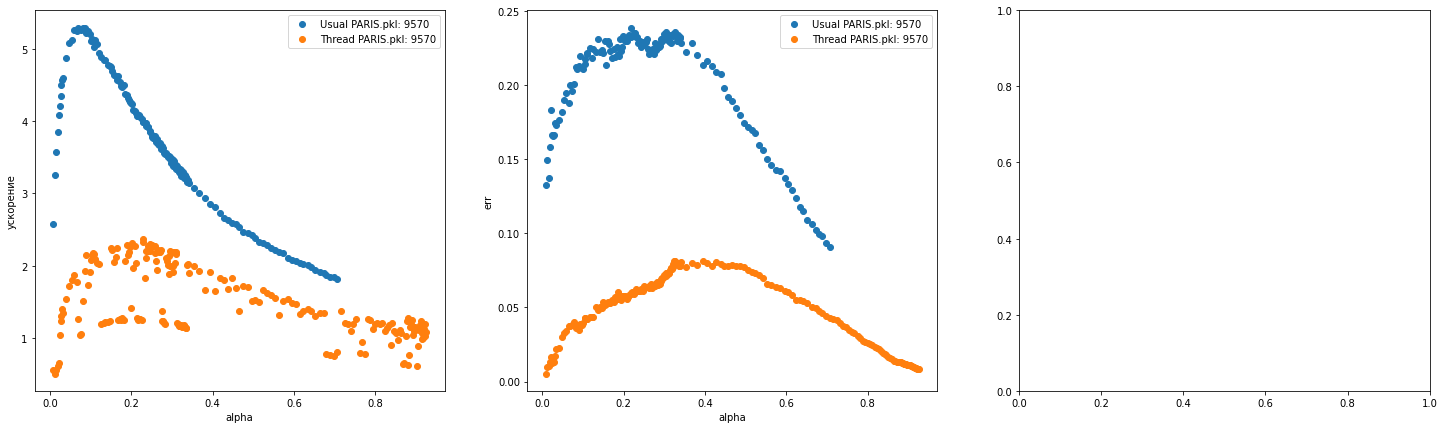

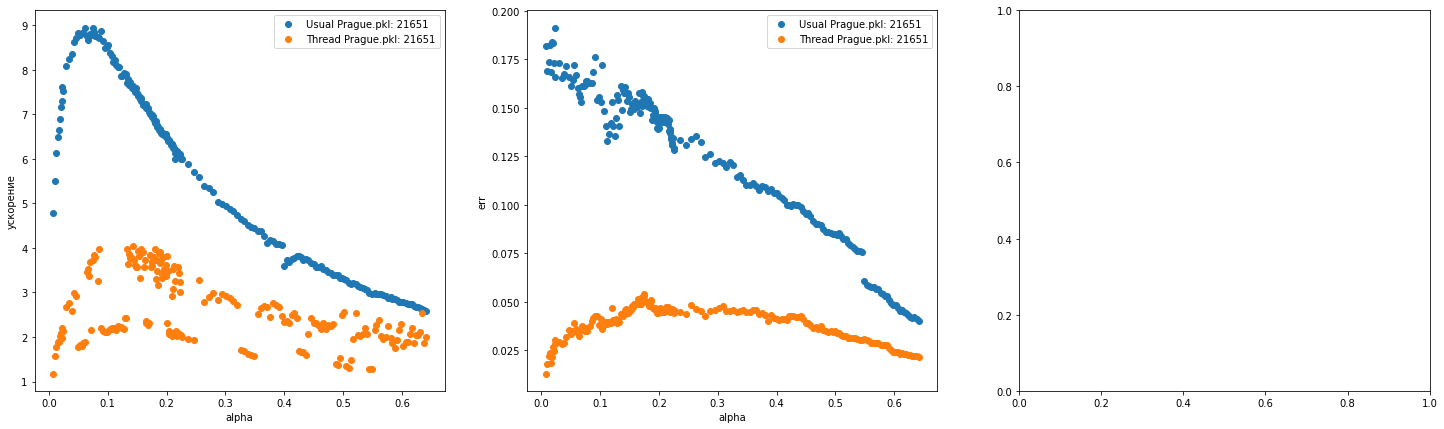

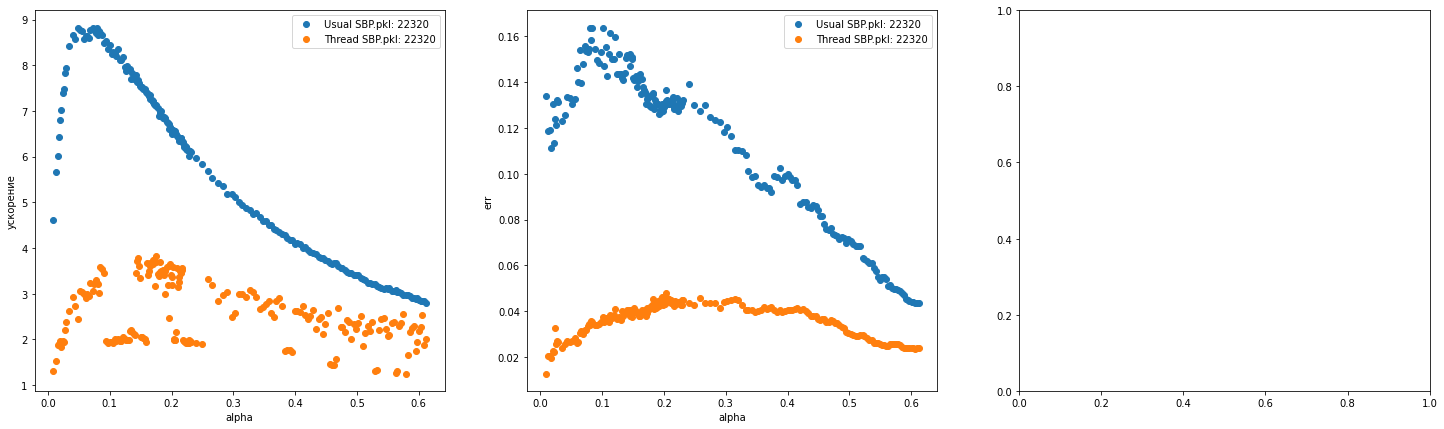

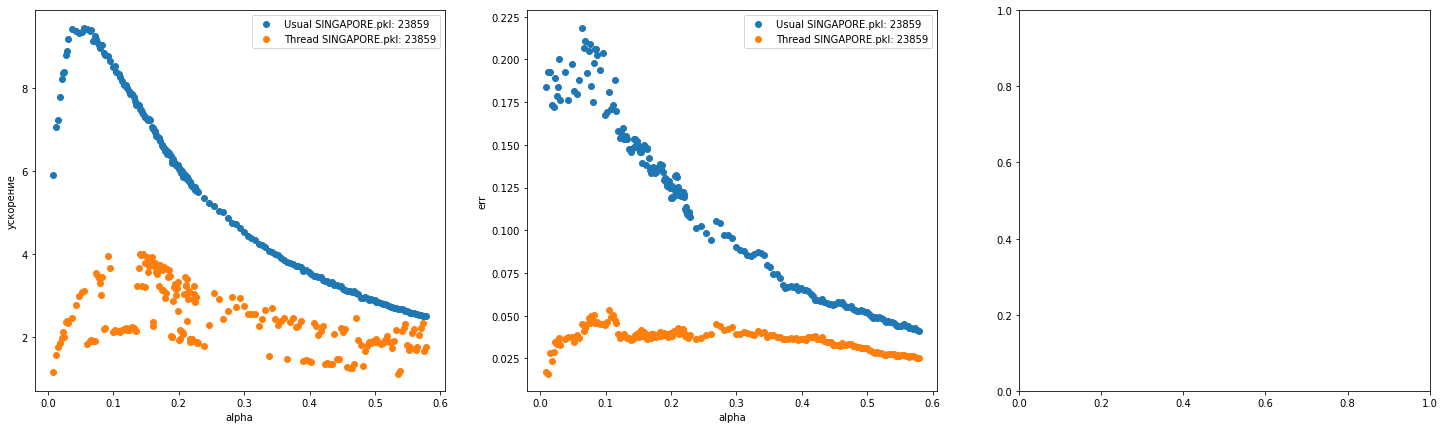

In [32]:
X_a_thread,Y_err_thread,_,Y_speedup_thread = get_date(thread_results)
X_a_usual,Y_err_usual,_,Y_speedup_usual = get_date(usual_results)

city_to_n = {}
X_max = {}
Y_speedup_max = {}
Y_err_speedup = {}

c = {}
b = {}
for name in thread_results:
    print(name + ' ' + str(thread_results[name].nodes))
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)
    axs[0].errorbar(X_a_usual[name], Y_speedup_usual[name], fmt='o', label = "Usual {}: {}".format(name, thread_results[name].nodes))
    axs[0].errorbar(X_a_thread[name], Y_speedup_thread[name], fmt='o', label = "Thread {}: {}".format(name, thread_results[name].nodes))
    axs[0].set(xlabel='alpha', ylabel='ускорение')
    axs[0].legend()

    axs[1].errorbar(X_a_usual[name], Y_err_usual[name], fmt='o', label = "Usual {}: {}".format(name, thread_results[name].nodes))
    axs[1].errorbar(X_a_thread[name], Y_err_thread[name], fmt='o', label = "Thread {}: {}".format(name, thread_results[name].nodes))
    axs[1].set(xlabel='alpha', ylabel='err')
    axs[1].legend()

Построим график ускорения от плотности

NameError: name 'r' is not defined

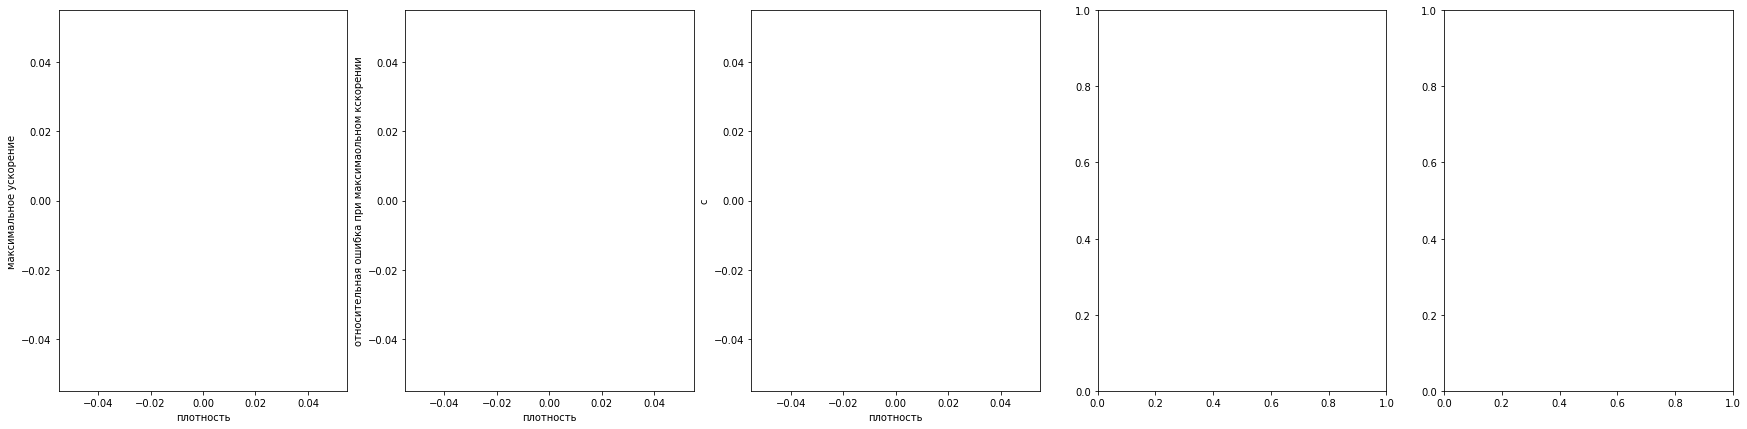

In [31]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

def t_f(x, N, b):
    return

fig, axs = plt.subplots(1, 5)
fig.set_figwidth(30)
fig.set_figheight(7)


X_betta = [city_to_n[name] for name in city_to_n]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup]

Y_c = [c[name] for name in c]
Y_b = [b[name] for name in b]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')


axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')



axs[2].errorbar(X_betta, Y_c, fmt='o')
axs[2].set(xlabel='плотность', ylabel='c')
X_betta = [r[n].density for n in r]

axs[3].errorbar(X_betta, Y_b, fmt='o')
axs[3].set(xlabel='плотность', ylabel='b')


axs[4].errorbar(X_betta, [X_max[name] for name in X_max], fmt='o')
axs[4].set(xlabel='плотность', ylabel='alpha')

plt.show()

In [ ]:
def line(x, a,b):
    return a*x + b

def line_predict(x, a,b,alpha, N):
    # print("a:{:.2f} n:{:.2f}".format(alpha, N))
    return a*x/(alpha * (1 + np.log(alpha)/np.log(N))) + b

def inverse(x,a,b,c):
    return a*(x**c) + b

Уберем последние 4 точки

In [ ]:
# X_max = {}
# Y_speedup_max = {}
# Y_err_speedup = {}

fig, axs = plt.subplots(1, 2)
fig.set_figwidth(25)
fig.set_figheight(7)

X_max_1 = dict(list(X_max.items())[0:-5])
X_betta = [r[n].density for n in r][0:-5]
Y_betta_speedup =[Y_speedup_max[n] for n in Y_speedup_max][0:-5]
Y_betta_err =[Y_err_speedup[n] for n in Y_err_speedup][0:-5]

axs[0].errorbar(X_betta, Y_betta_speedup, fmt='o')
axs[0].set(xlabel='плотность', ylabel='максимальное ускорение')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X_betta,Y_betta_speedup)

_x = np.linspace(min(X_betta), max(X_betta))
_y = slope * _x + intercept
axs[0].errorbar(_x, _y,label = '{:.2f}x + {:.2f}. R2:{:.4f}'.format(slope,intercept, r_value**2))
axs[0].legend()


# _x = X_betta
# f = partial(line_predict, N = [r[name].nodes for name in r][0])
# _y = []
# for i,a in enumerate(X_max_1):
#     _y.append(f(_x[i], slope/15, intercept, X_max_1[a]))
#
# axs[0].errorbar(_x, _y, fmt = 'o')
# axs[0].legend()



axs[1].errorbar(X_betta, Y_betta_err, fmt='o')
axs[1].set(xlabel='плотность', ylabel='относительная ошибка при максимаольном кскорении')

popt = curve_fit(inverse, X_betta, Y_betta_err, p0=[0.000000015, -1.5,0.06])
_xx = np.linspace(min(X_betta), max(X_betta), 300)
_yy = inverse(_xx, *popt[0])
axs[1].errorbar(_xx, _yy,label = '{:.10f}x^(-2) + {:.4f}'.format(popt[0][0],popt[0][1]))
axs[1].legend()
plt.show()

In [ ]:
from graph_generator import get_graph

H = get_graph('R2555133')


In [ ]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (np.sqrt(x * N)) * (1 - q))

for name in r:
    fig, axs = plt.subplots(1, 3)
    fig.set_figwidth(25)
    fig.set_figheight(7)

    axs[0].errorbar(X_a[name], Y_speedup[name], fmt='o', label = "{}: {}".format(name, r[name].nodes))
    axs[0].set(xlabel='alpha'+ str(r[name].density), ylabel='ускорение')

    # func_r = partial(theory_func, N=r[name].nodes, b0=r[name].edges/r[name].nodes)
    # print(str(r[name].nodes) + ' ' + str(r[name].edges/r[name].nodes))
    # print(str(r[name].nodes) + ' ' + str(2*r[name].edges/(r[name].nodes * (r[name].nodes-1))))

    _x = np.array(X_a[name])
    _x = _x[_x < 0.6]
    _xx = np.linspace(min(_x), max(_x), 100)

    func_target = partial(_f, N=r[name].nodes)
    _y = func_target(np.array(_xx))
    axs[0].errorbar(_xx, _y, linewidth=3)
    axs[0].legend()
    # axs[1].errorbar(X_a[name], Y_err[name], fmt='o')
    # axs[1].set(xlabel='alpha' + str(r[name].density), ylabel='средняя относительная ошибка')
    # z = np.polyfit(X_a[name], Y_err[name], 6)
    # p = np.poly1d(z)
    # axs[1].errorbar(_xx, p(_xx), fmt='o')
    # Y_err_speedup[name] = p(a)
    #
    #
    #
    # axs[2].errorbar(X_a[name], Y_err_std[name], fmt='o')
    # axs[2].set(xlabel='alpha'+ str(r[name].density), ylabel='погрешность ошибки')

    # file_name = generate_new_name(name + '.png', 'plots')

    # plt.savefig(file_name)

In [ ]:
def _f(x, N):
    q = np.log(x) / np.log(N)
    return 1 / (x * (1 + q) + 1 / (2*np.sqrt(x * N)) * (1 - q))

arr_N = [i for i in range(10000, 100000,100)]
y = []
for i in arr_N:
    func_target = partial(_f, N=i)
    a = scipy.optimize.fminbound(lambda x: -func_target(x), 0, 1)
    y.append(func_target(a))

fig, axs = plt.subplots(1, 1)
fig.set_figwidth(25)
fig.set_figheight(7)

axs.errorbar(arr_N, y, linewidth=3,label='a')
axs.errorbar(arr_N, (np.array(arr_N)) ** 0.317 -1.5, linewidth=3, label = 'b')
axs.legend()
